# ANALYSIS BY STANLEY UZUM

In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import warnings
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel("C:/Users/tbigg/Downloads/Applicants_data.xlsx")

In [ ]:
data

,player_id,Year,Month,team_id,created_at,lat,lng,scan_mode,distance,steps,scanType,qid,Month Name
0,addrdealitakf,2023,8,15910,2023-08-27 08:46:28,NaN,NaN,NaN,0.0,NaN,NaN,NaN,August
1,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,August
2,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,August
3,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,August
4,addrdealitakf,2023,8,15910,2023-08-01 20:33:30,NaN,NaN,NaN,0.0,NaN,NaN,NaN,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115943,addrdealitakf,2023,8,15910,2023-08-03 20:16:11,NaN,NaN,NaN,NaN,1128.0,NaN,NaN,August
115944,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,NaN,NaN,NaN,NaN,1478.0,NaN,NaN,August
115945,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,NaN,NaN,NaN,NaN,1478.0,NaN,NaN,August
115946,addrdealitakf,2023,8,15910,2023-08-04 05:37:31,NaN,NaN,NaN,NaN,133.0,NaN,NaN,August


In [ ]:
data.nunique()

player_id       378
Year              1
Month             7
team_id         128
created_at    78643
lat            3668
lng            3668
scan_mode         3
distance      12857
steps          6184
scanType          3
qid            3662
Month Name        7
dtype: int64

In [ ]:
#Checking percentage of null values

(data.isnull().sum()/(len(data)))*100

player_id      0.000000
Year           0.000000
Month          0.000000
team_id        0.000000
created_at     0.000000
lat           53.580916
lng           53.580916
scan_mode     53.580916
distance      28.485183
steps         71.514817
scanType      33.024287
qid           53.580916
Month Name     0.000000
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115948 entries, 0 to 115947
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   player_id   115948 non-null  object        
 1   Year        115948 non-null  int64         
 2   Month       115948 non-null  int64         
 3   team_id     115948 non-null  int64         
 4   created_at  115948 non-null  datetime64[ns]
 5   lat         53822 non-null   float64       
 6   lng         53822 non-null   float64       
 7   scan_mode   53822 non-null   object        
 8   distance    82920 non-null   float64       
 9   steps       33028 non-null   float64       
 10  scanType    77657 non-null   object        
 11  qid         53822 non-null   float64       
 12  Month Name  115948 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 11.5+ MB


## Handling Missing Value

In [ ]:
# Fill missing numerical values with mean

numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

data.isnull().sum()

player_id         0
Year              0
Month             0
team_id           0
created_at        0
lat               0
lng               0
scan_mode     62126
distance          0
steps             0
scanType      38291
qid               0
Month Name        0
dtype: int64

In [ ]:
# Fill missing categorical values with mode

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()

player_id     0
Year          0
Month         0
team_id       0
created_at    0
lat           0
lng           0
scan_mode     0
distance      0
steps         0
scanType      0
qid           0
Month Name    0
dtype: int64

In [ ]:
data

,player_id,Year,Month,team_id,created_at,lat,lng,scan_mode,distance,steps,scanType,qid,Month Name
0,addrdealitakf,2023,8,15910,2023-08-27 08:46:28,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August
1,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August
2,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August
3,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August
4,addrdealitakf,2023,8,15910,2023-08-01 20:33:30,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115943,addrdealitakf,2023,8,15910,2023-08-03 20:16:11,53.17789,0.009565,Walking,0.469791,1128.000000,virtual,1.063262e+07,August
115944,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,53.17789,0.009565,Walking,0.469791,1478.000000,virtual,1.063262e+07,August
115945,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,53.17789,0.009565,Walking,0.469791,1478.000000,virtual,1.063262e+07,August
115946,addrdealitakf,2023,8,15910,2023-08-04 05:37:31,53.17789,0.009565,Walking,0.469791,133.000000,virtual,1.063262e+07,August


In [ ]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values for {col}: {unique_values}")

Unique values for player_id: ['addrdealitakf' 'abrdkral' 'abjtdegt15' 'algteaejitt' 'itejrtjdte'
 'ftallt' 'ttattdjrt' 'njtrtn' 'ttalltktdegt15' 'ttjirt' 'tarejkbt'
 'tgft12345' 'itlfrtbaeetr' 'ieakttitee'
 '0n6265782D6D756D6D796361626F75726E' 'dreertnj' 'iattriabb' 'tallatce03'
 'nbn728' 'bjbbadtak' 'atgbbtkt' 'drdrigee81' 'ijattrije' 'etaeta89'
 'etlfjg14' 'brigtrdegt256' '17fi01' 'aigeetr' 'arkreigee50'
 'itakejtttikrgtt1086' 'ittettatfrtjl' 'iej27' 'fartralftftlitktgbbtkt'
 'ftbfttrigee2012' 'cktffrttfrtjl' 'gtjkgttfrtjl' 'njallt101'
 'ejgalftllrt' 'ballrlggrket' 'kttikjltr' 't02' 'tabatrl' 'alfrtldjrt'
 'djddrttittt' 'tejit' 'njfrtbgeetl' 'njjea' 'ejgall' 'jejit' 'giaktaf'
 'nalrltdk' 'ntbbatti' 'itaaaa77' 'nbaedjl' 'ttatt84' 'ittaarejitt'
 'lrlnaejit' 'etlfjg1' 'kjdtta127' 'dgigrlgtab7' 'farrfbakkrjtt'
 'ce03tallat' 'garball' 'bgbbrjccjgk' 'karrr' 'talrain' 'itlfrtbaeetr1'
 'tabejirt123' 'tballrlg1' 'lrijeaalftktjl' 'k_ttak' 'nait' 'egirda'
 'atttla' 'iearktnakbr' 'fttt' 'tftldkr

## Feature Enginnering

to Create new features that may be predictive of churn. For example, i could calculate metrics such as:
 - average distance covered per scan,
 - average steps taken per scan,
 - frequency of scans, etc.
Time-based features could also be useful, such as:
- the time of day or day of the week when the scan was performed.

After performing feature engineering, the target variable for our churn prediction model would typically be a binary variable indicating whether a user has churned or not. This variable could be derived from the available data based on a specific definition of churn.

Here are a few common ways to define churn and derive the target variable:

Time-based Churn: Define churn based on a period of inactivity or non-usage. For example, if a user has not performed any scans or activities within the app for a certain period (e.g., 30 days), they could be considered as churned.

Behavior-based Churn: Define churn based on a significant decrease in activity compared to a user's historical behavior. For example, if a user's scan frequency or distance covered drops below a certain threshold compared to their past behavior, they could be considered as churned.

Event-based Churn: Define churn based on specific events or actions indicating disengagement. For example, if a user unsubscribes from notifications, deletes their account, or performs a certain action indicating dissatisfaction or intent to leave the platform, they could be considered as churned.

Once you have defined churn based on one of these criteria, you can derive the target variable by labeling users as "churned" (1) if they meet the churn criteria and "not churned" (0) otherwise. This target variable will be used to train and evaluate your churn prediction model.

In [ ]:
# Frequency of Scans
data['total_scans'] = data.groupby('team_id')['team_id'].transform('count')
data['Created_at'] = pd.to_datetime(data['created_at'])  # Convert 'Created_at' to datetime if it's not already
data['min_created_at'] = data.groupby('team_id')['created_at'].transform('min')
data['days_since_first_scan'] = (data['created_at'] - data['min_created_at']).dt.days
data['avg_scans_per_day'] = data['total_scans'] / data['days_since_first_scan']


# Average Distance Covered per Scan
data['avg_distance_per_scan'] = data['distance'] / data['total_scans']

# Average Steps Taken per Scan
data['avg_steps_per_scan'] = data['steps'] / data['total_scans']

# Time-based Features
data['hour_of_day'] = pd.to_datetime(data['created_at']).dt.hour
data['day_of_week'] = pd.to_datetime(data['created_at']).dt.dayofweek
data['is_peak_hour'] = ((data['hour_of_day'] >= 7) & (data['hour_of_day'] <= 9)) | ((data['hour_of_day'] >= 17) & (data['hour_of_day'] <= 19))
data['is_weekend'] = data['day_of_week'].isin([5, 6])
data['time_since_first_scan'] = (pd.to_datetime(data['created_at']) - data.groupby('team_id')['created_at'].transform('min')).dt.days


# Interaction Features
data['distance_steps_interaction'] = data['distance'] * data['steps']

In [ ]:
data

,player_id,Year,Month,team_id,created_at,lat,lng,scan_mode,distance,steps,...,days_since_first_scan,avg_scans_per_day,avg_distance_per_scan,avg_steps_per_scan,hour_of_day,day_of_week,is_peak_hour,is_weekend,time_since_first_scan,distance_steps_interaction
0,addrdealitakf,2023,8,15910,2023-08-27 08:46:28,53.17789,0.009565,Walking,0.000000,1506.575451,...,46,994.217391,0.00000,0.032942,8,6,True,True,46,0.000000
1,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,...,45,1016.311111,0.00000,0.032942,21,5,False,True,45,0.000000
2,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,...,45,1016.311111,0.00000,0.032942,21,5,False,True,45,0.000000
3,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,...,45,1016.311111,0.00000,0.032942,21,5,False,True,45,0.000000
4,addrdealitakf,2023,8,15910,2023-08-01 20:33:30,53.17789,0.009565,Walking,0.000000,1506.575451,...,20,2286.700000,0.00000,0.032942,20,1,False,False,20,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115943,addrdealitakf,2023,8,15910,2023-08-03 20:16:11,53.17789,0.009565,Walking,0.469791,1128.000000,...,22,2078.818182,0.00001,0.024664,20,3,False,False,22,529.924648
115944,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,53.17789,0.009565,Walking,0.469791,1478.000000,...,22,2078.818182,0.00001,0.032317,20,3,False,False,22,694.351622
115945,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,53.17789,0.009565,Walking,0.469791,1478.000000,...,22,2078.818182,0.00001,0.032317,20,3,False,False,22,694.351622
115946,addrdealitakf,2023,8,15910,2023-08-04 05:37:31,53.17789,0.009565,Walking,0.469791,133.000000,...,23,1988.434783,0.00001,0.002908,5,4,False,False,23,62.482250


##


1. **total_scans**: This variable represents the total number of scans performed by each team. It's calculated by grouping the DataFrame by 'team_id' and then counting the occurrences of each 'team_id'.

2. **Created_at**: This variable represents the timestamp when each scan was performed. It's converted to datetime format using `pd.to_datetime()`.

3. **min_created_at**: This variable represents the minimum 'Created_at' timestamp for each team. It's calculated by grouping the DataFrame by 'team_id' and finding the minimum timestamp for each group.

4. **days_since_first_scan**: This variable represents the number of days elapsed since the first scan for each team. It's calculated by subtracting the 'min_created_at' timestamp from the 'Created_at' timestamp and extracting the number of days using the `.dt.days` accessor.

5. **avg_scans_per_day**: This variable represents the average number of scans per day for each team. It's calculated by dividing the 'total_scans' by the 'days_since_first_scan'.

6. **avg_distance_per_scan**: This variable represents the average distance covered per scan for each team. It's calculated by dividing the 'distance' by the 'total_scans'.

7. **avg_steps_per_scan**: This variable represents the average number of steps taken per scan for each team. It's calculated by dividing the 'steps' by the 'total_scans'.

8. **hour_of_day**: This variable represents the hour of the day when each scan was performed. It's extracted from the 'Created_at' timestamp using `.dt.hour`.

9. **day_of_week**: This variable represents the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) when each scan was performed. It's extracted from the 'Created_at' timestamp using `.dt.dayofweek`.

10. **is_peak_hour**: This variable is a binary indicator (True/False) representing whether each scan was performed during peak hours of Dusk and Dawn (7-9 AM or 5-7 PM). It's based on the 'hour_of_day' variable.

11. **is_weekend**: This variable is a binary indicator (True/False) representing whether each scan was performed on a weekend (Saturday or Sunday). It's based on the 'day_of_week' variable.

12. **time_since_first_scan**: This variable represents the number of days elapsed since the first scan for each team. It's calculated by subtracting the 'min_created_at' timestamp from the 'Created_at' timestamp and extracting the number of days using the `.dt.days` accessor.

13. **distance_steps_interaction**: This variable represents the interaction between 'distance' and 'steps' for each scan. It's calculated by multiplying the 'distance' by the 'steps'.

These variables capture various aspects of user behavior, engagement, and context that may be predictive of churn. They can be used as features in a churn prediction model to identify patterns and trends associated with user churn.

In [ ]:

# Drop unnecessary columns
data.drop(['Qid', 'Created_at'], axis=1, inplace=True)

In [ ]:
data.nunique()

player_id                       378
Year                              1
Month                             7
team_id                         128
created_at                    78643
lat                            3669
lng                            3669
scan_mode                         3
distance                      12858
steps                          6185
scanType                          3
qid                            3663
Month Name                        7
total_scans                      49
Created_at                    78643
min_created_at                  128
days_since_first_scan           210
avg_scans_per_day              1562
avg_distance_per_scan         19278
avg_steps_per_scan            12203
hour_of_day                      24
day_of_week                       7
is_peak_hour                      2
is_weekend                        2
time_since_first_scan           210
distance_steps_interaction    19040
dtype: int64

In [ ]:
data.total_scans.unique()

array([45734, 22618, 21587, 15042,  1480,  5553,   350,   285,     1,
          79,     4,    10,     5,     6,    98,    19,   559,    15,
          45,    18,     7,     9,   183,    16,    25,   119,     2,
          21,    13,     3,    66,   378,   126,    27,    28,    64,
         259,   154,    31,    17,    22,    46,   167,    12,    30,
          14,     8,    47,    20], dtype=int64)

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Print the DataFrame
data.head(30)


,player_id,Year,Month,team_id,created_at,lat,lng,scan_mode,distance,steps,scanType,qid,Month Name,total_scans,Created_at,min_created_at,days_since_first_scan,avg_scans_per_day,avg_distance_per_scan,avg_steps_per_scan,hour_of_day,day_of_week,is_peak_hour,is_weekend,time_since_first_scan,distance_steps_interaction
0,addrdealitakf,2023,8,15910,2023-08-27 08:46:28,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-27 08:46:28,2023-07-11 22:19:36,46,994.217391,0.0,0.032942,8,6,True,True,46,0.0
1,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 21:11:46,2023-07-11 22:19:36,45,1016.311111,0.0,0.032942,21,5,False,True,45,0.0
2,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 21:11:46,2023-07-11 22:19:36,45,1016.311111,0.0,0.032942,21,5,False,True,45,0.0
3,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 21:11:46,2023-07-11 22:19:36,45,1016.311111,0.0,0.032942,21,5,False,True,45,0.0
4,addrdealitakf,2023,8,15910,2023-08-01 20:33:30,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-01 20:33:30,2023-07-11 22:19:36,20,2286.700000,0.0,0.032942,20,1,False,False,20,0.0
5,addrdealitakf,2023,8,15910,2023-08-01 20:32:49,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-01 20:32:49,2023-07-11 22:19:36,20,2286.700000,0.0,0.032942,20,1,False,False,20,0.0
6,addrdealitakf,2023,8,15910,2023-08-01 19:19:41,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-01 19:19:41,2023-07-11 22:19:36,20,2286.700000,0.0,0.032942,19,1,True,False,20,0.0
7,addrdealitakf,2023,8,15910,2023-08-02 07:26:40,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-02 07:26:40,2023-07-11 22:19:36,21,2177.809524,0.0,0.032942,7,2,True,False,21,0.0
8,addrdealitakf,2023,8,15910,2023-08-26 12:06:17,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 12:06:17,2023-07-11 22:19:36,45,1016.311111,0.0,0.032942,12,5,False,True,45,0.0
9,addrdealitakf,2023,8,15910,2023-08-25 20:54:30,53.17789,0.009565,Walking,0.0,1506.575451,virtual,1.063262e+07,August,45734,2023-08-25 20:54:30,2023-07-11 22:19:36,44,1039.409091,0.0,0.032942,20,4,False,False,44,0.0


In [ ]:
# Define churn threshold (e.g., if a user has fewer than 10 scans in the last 30 days)
scans_threshold = 10
days_threshold = 30

# Create a new column to determine churn
data['churn'] = ((data['total_scans'] < scans_threshold) & (data['days_since_first_scan'] >= days_threshold)).astype(int)

data

,player_id,Year,Month,team_id,created_at,lat,lng,scan_mode,distance,steps,scanType,qid,Month Name,total_scans,Created_at,min_created_at,days_since_first_scan,avg_scans_per_day,avg_distance_per_scan,avg_steps_per_scan,hour_of_day,day_of_week,is_peak_hour,is_weekend,time_since_first_scan,distance_steps_interaction,churn
0,addrdealitakf,2023,8,15910,2023-08-27 08:46:28,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August,45734,2023-08-27 08:46:28,2023-07-11 22:19:36,46,994.217391,0.00000,0.032942,8,6,True,True,46,0.000000,0
1,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 21:11:46,2023-07-11 22:19:36,45,1016.311111,0.00000,0.032942,21,5,False,True,45,0.000000,0
2,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 21:11:46,2023-07-11 22:19:36,45,1016.311111,0.00000,0.032942,21,5,False,True,45,0.000000,0
3,addrdealitakf,2023,8,15910,2023-08-26 21:11:46,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August,45734,2023-08-26 21:11:46,2023-07-11 22:19:36,45,1016.311111,0.00000,0.032942,21,5,False,True,45,0.000000,0
4,addrdealitakf,2023,8,15910,2023-08-01 20:33:30,53.17789,0.009565,Walking,0.000000,1506.575451,virtual,1.063262e+07,August,45734,2023-08-01 20:33:30,2023-07-11 22:19:36,20,2286.700000,0.00000,0.032942,20,1,False,False,20,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115943,addrdealitakf,2023,8,15910,2023-08-03 20:16:11,53.17789,0.009565,Walking,0.469791,1128.000000,virtual,1.063262e+07,August,45734,2023-08-03 20:16:11,2023-07-11 22:19:36,22,2078.818182,0.00001,0.024664,20,3,False,False,22,529.924648,0
115944,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,53.17789,0.009565,Walking,0.469791,1478.000000,virtual,1.063262e+07,August,45734,2023-08-03 20:35:23,2023-07-11 22:19:36,22,2078.818182,0.00001,0.032317,20,3,False,False,22,694.351622,0
115945,addrdealitakf,2023,8,15910,2023-08-03 20:35:23,53.17789,0.009565,Walking,0.469791,1478.000000,virtual,1.063262e+07,August,45734,2023-08-03 20:35:23,2023-07-11 22:19:36,22,2078.818182,0.00001,0.032317,20,3,False,False,22,694.351622,0
115946,addrdealitakf,2023,8,15910,2023-08-04 05:37:31,53.17789,0.009565,Walking,0.469791,133.000000,virtual,1.063262e+07,August,45734,2023-08-04 05:37:31,2023-07-11 22:19:36,23,1988.434783,0.00001,0.002908,5,4,False,False,23,62.482250,0


##

In this code:

I define a threshold for churn, such as having fewer than 10 scans in the last 30 days.
I create a new column 'churn' where we classify users as churned (1) if they meet the churn criteria or not churned (0) otherwise.
thresholds can be adjusted based on the Order/Request from Stalkholders or Supervisor.

## Feature Selection

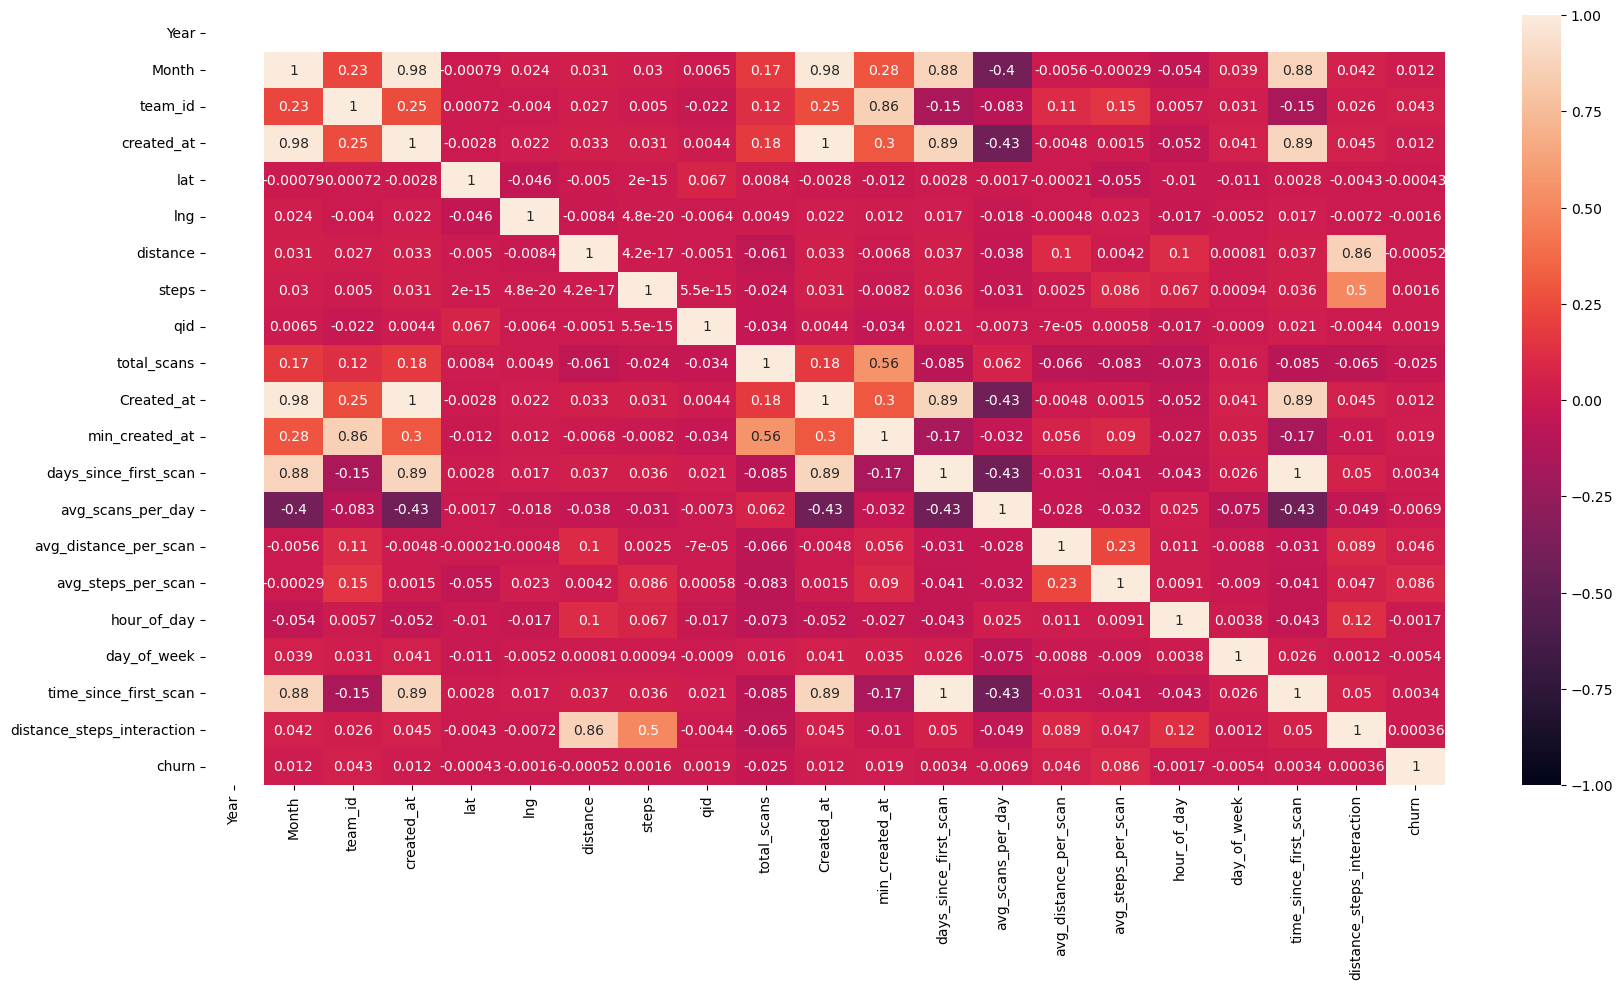

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.drop(['is_weekend', 'is_peak_hour', 'Month Name', 'scanType',
       'scan_mode', 'player_id'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select all numerical columns as features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
target = 'churn'

# Check if the target variable is in the list of numerical features before removing it
if target in numerical_features:
    numerical_features.remove(target)
else:
    print("Target variable not found in numerical features.")

# Preprocess numerical features to handle infinite or very large values
for feature in numerical_features:
    data[feature] = data[feature].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
    data[feature] = data[feature].fillna(data[feature].mean())  # Replace NaN with mean of the feature

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[numerical_features], data[target], test_size=0.2, random_state=42)

# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=numerical_features)

# Sort feature importance in descending order
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Select top features
top_features = feature_importance_sorted.index.tolist()

# Print top features
print("Top Features:")
print(top_features)




Target variable not found in numerical features.
Top Features:
['avg_scans_per_day', 'days_since_first_scan', 'time_since_first_scan', 'total_scans', 'avg_steps_per_scan', 'avg_distance_per_scan', 'team_id', 'lat', 'distance_steps_interaction', 'qid', 'lng', 'steps', 'Month', 'distance', 'Year']


## Predictive Model

In [ ]:
x = data[['avg_scans_per_day', 'days_since_first_scan', 'time_since_first_scan', 'total_scans',
          'avg_steps_per_scan', 'avg_distance_per_scan', 'team_id', 'lat', 'distance_steps_interaction',
          'qid', 'lng', 'steps', 'Month', 'distance', 'Year']]
y = data['churn']


##

 Since churn prediction is often imbalanced (fewer churners compared to non-churners), i will consider using techniques like stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92758, 15)
(23190, 15)
(92758,)
(23190,)


## Feature Scaling
Effect of Feature Scale:

 - Standardization can help algorithms converge faster and can make the optimization process more stable.
 - It can also prevent features with larger scales from dominating the optimization process, especially in algorithms that use distance metrics or gradient-based optimization.

In [ ]:
from sklearn.preprocessing import StandardScaler
stndrd = StandardScaler()
X_train = stndrd.fit_transform(X_train)
X_test = stndrd.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the validation set
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Evaluation:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


Epoch 1/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9874 - loss: 0.0459 - val_accuracy: 0.9998 - val_loss: 6.4645e-04
Epoch 2/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9999 - loss: 6.4091e-04 - val_accuracy: 0.9998 - val_loss: 4.7128e-04
Epoch 3/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9999 - loss: 3.4329e-04 - val_accuracy: 0.9999 - val_loss: 4.3221e-04
Epoch 4/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 1.0000 - loss: 1.5542e-04 - val_accuracy: 0.9999 - val_loss: 2.6767e-04
Epoch 5/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 1.5342e-04 - val_accuracy: 0.9999 - val_loss: 3.1320e-04
Epoch 6/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 1.4267e-04 - val_accuracy: 0.9999 - val_loss: 2.4340e-04
Epoch 7/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 7.2274e-05 - val_accuracy: 0.9999 - val_loss: 6.7022e-04
Epoch 8/10
2899/2899 ━━━━━━━━━━━

## Gradient Boosting (using XGBoost):

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23186
           1       1.00      1.00      1.00         4

    accuracy                           1.00     23190
   macro avg       1.00      1.00      1.00     23190
weighted avg       1.00      1.00      1.00     23190

Confusion Matrix:
[[23186     0]
 [    0     4]]


## Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lr = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23186
           1       0.00      0.00      0.00         4

    accuracy                           1.00     23190
   macro avg       0.50      0.50      0.50     23190
weighted avg       1.00      1.00      1.00     23190

Confusion Matrix:
[[23185     1]
 [    4     0]]


## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machines (SVM) Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machines (SVM) Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23186
           1       0.00      0.00      0.00         4

    accuracy                           1.00     23190
   macro avg       0.50      0.50      0.50     23190
weighted avg       1.00      1.00      1.00     23190

Confusion Matrix:
[[23186     0]
 [    4     0]]


## Visualizing Confusion Matrix

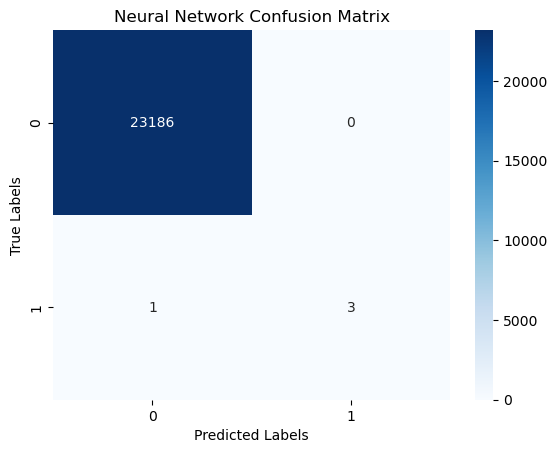

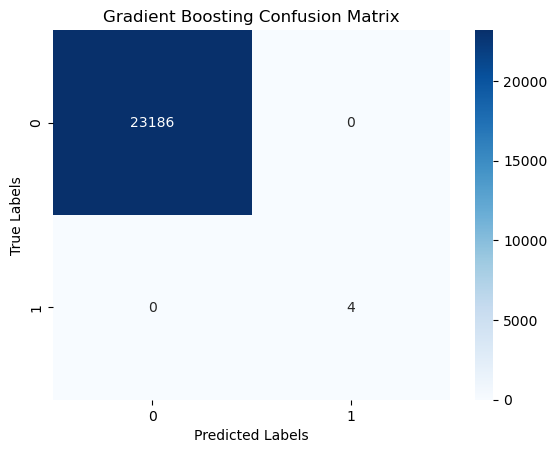

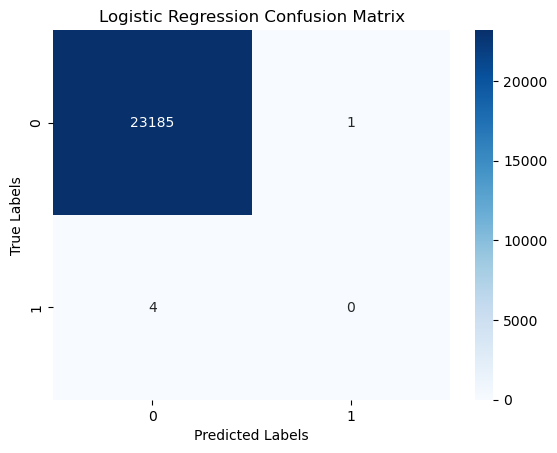

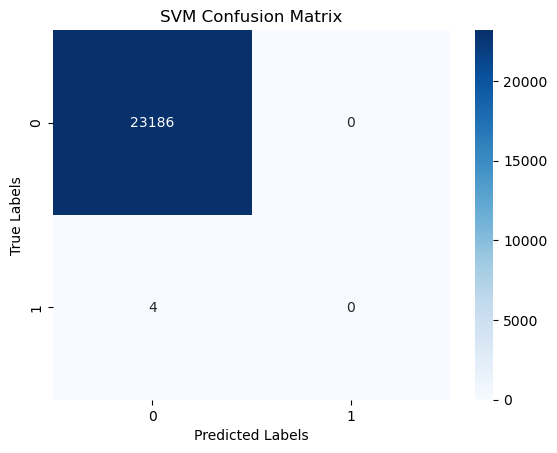

In [ ]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Call the function for each model
plot_confusion_matrix(y_test, y_pred_nn, title='Neural Network Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_xgb, title='Gradient Boosting Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_lr, title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_svm, title='SVM Confusion Matrix')
